In [62]:
%matplotlib inline
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
from io import BytesIO
from zipfile import ZipFile
from urllib.request import urlopen
from matplotlib import patches

In [63]:
city_assessments = gpd.read_file('https://opendata.arcgis.com/datasets/b993cd4e2e1b4ba097fb58c90725f5da_2.geojson')
parcels_area = gpd.read_file('https://opendata.arcgis.com/datasets/0e9946c2a77d4fc6ad16d9968509c588_72.geojson')
city_assessments.drop_duplicates(subset='ParcelNumber', keep='first', inplace=True)

areas_and_assessments = parcels_area.merge(city_assessments, on='ParcelNumber')


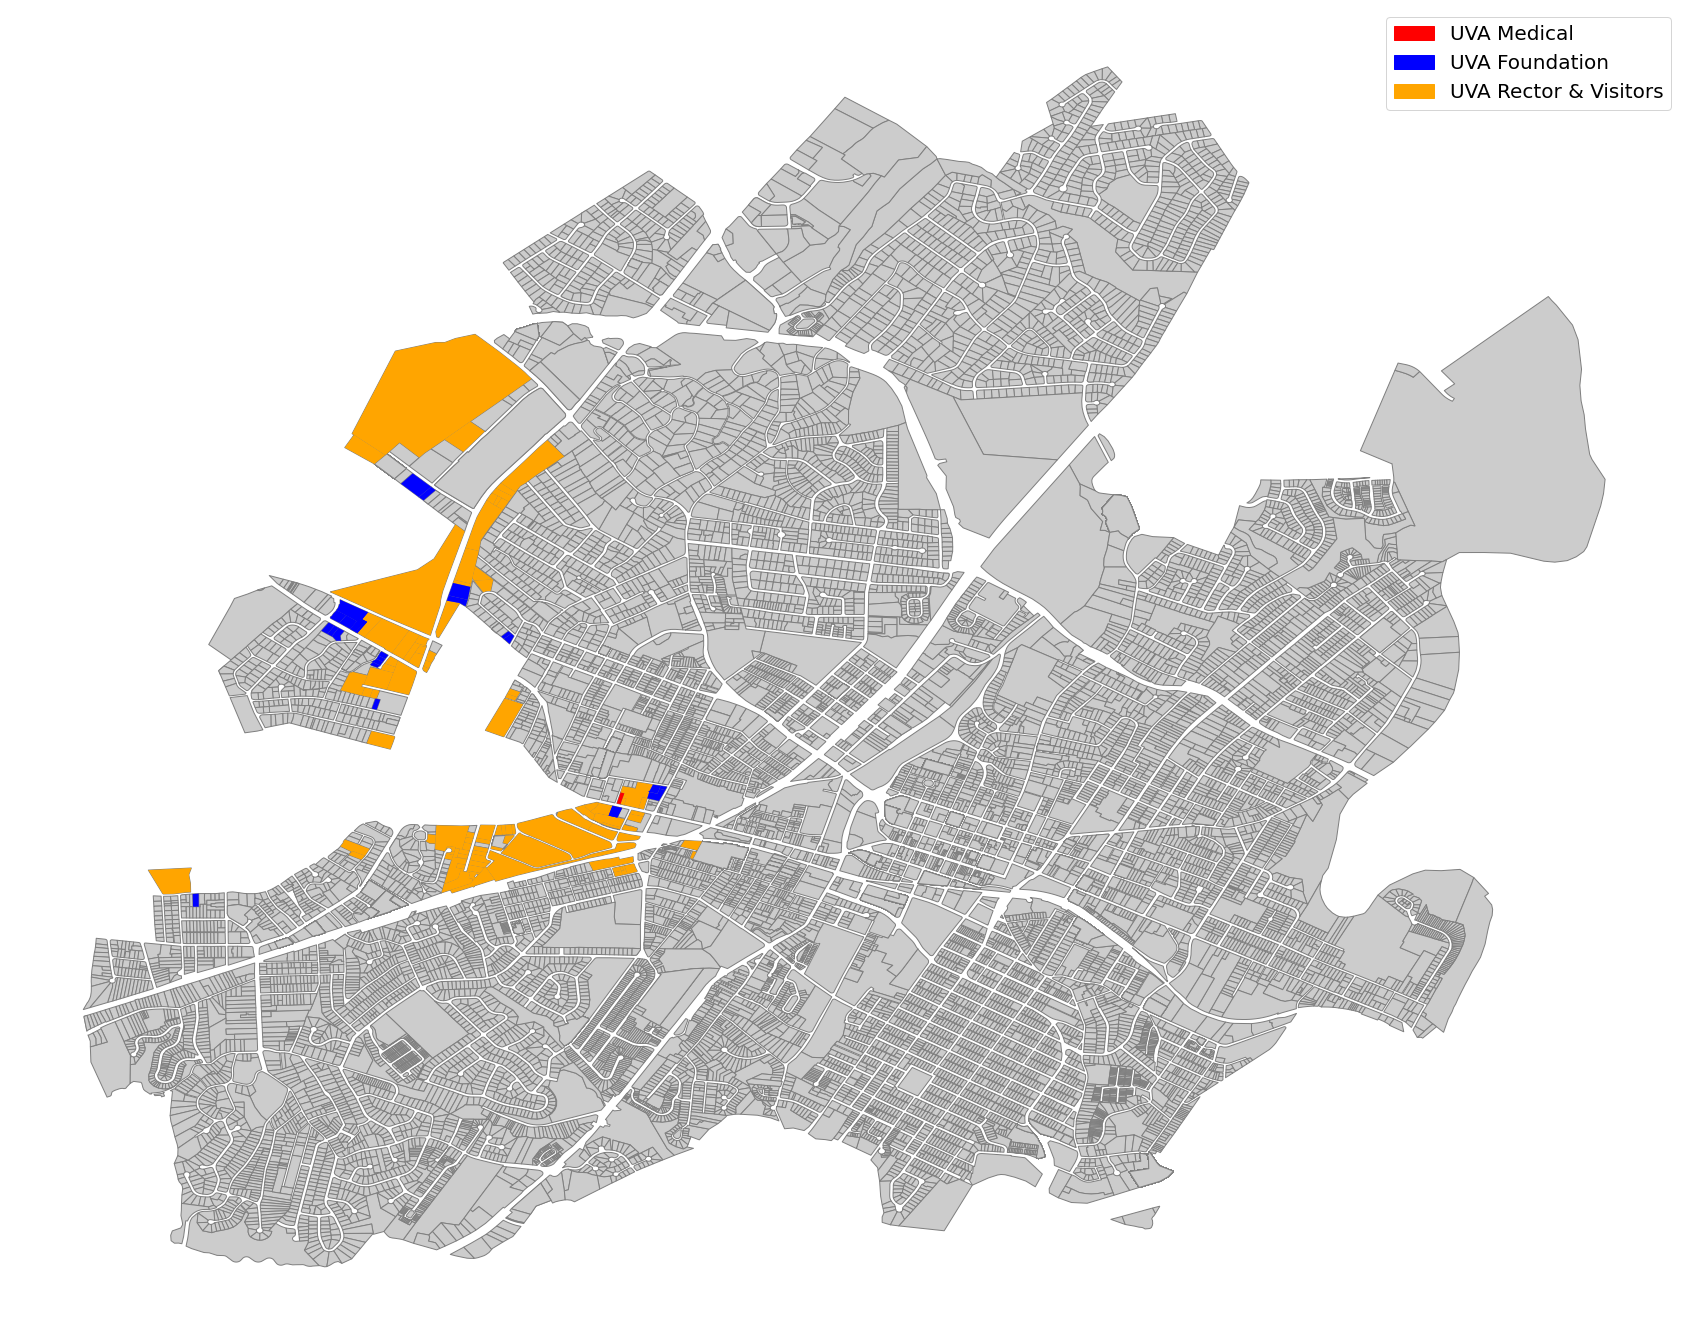

In [65]:
#print (newest)
newest = gpd.GeoDataFrame(areas_and_assessments, geometry='geometry_x')

uva_properties = newest[(newest['OwnerName'].str.contains('RECTOR &', regex=True)) | (newest['OwnerName'].str.contains('RECTOR, &', regex=True)) | (newest['OwnerName'].str.contains('RECTOR AND', regex=True))  ]
medschool = newest[newest['OwnerName'].str.contains('UNIVERSITY OF VA MEDICAL', regex=True) ]
foundation = newest[newest['OwnerName'].str.contains('UNIVERSITY OF VIRGINIA FOUNDATION', regex=True) ]


red_patch = patches.Patch(color='red', label='UVA Medical')
blue_patch = patches.Patch(color='blue', label='UVA Foundation')
orange_patch = patches.Patch(color='orange', label='UVA Rector & Visitors')

fig,ax = plt.subplots(figsize=(30,30))
newest.plot(ax=ax, color='0.8', edgecolor='0.5')
uva_properties.plot(ax=ax, color='orange')
foundation.plot(ax=ax, color='blue')
medschool.plot(ax=ax, color='red')
plt.legend(handles=[red_patch, blue_patch, orange_patch], fontsize=20)
#plt.savefig('cville_only_uva_inc_foundation_and_medschool.jpg')
#plt.close()
plt.axis("off")
plt.show()

['GIS_View_Redacted_ParcelInfo.xlsx']
epsg:2284
epsg:4326


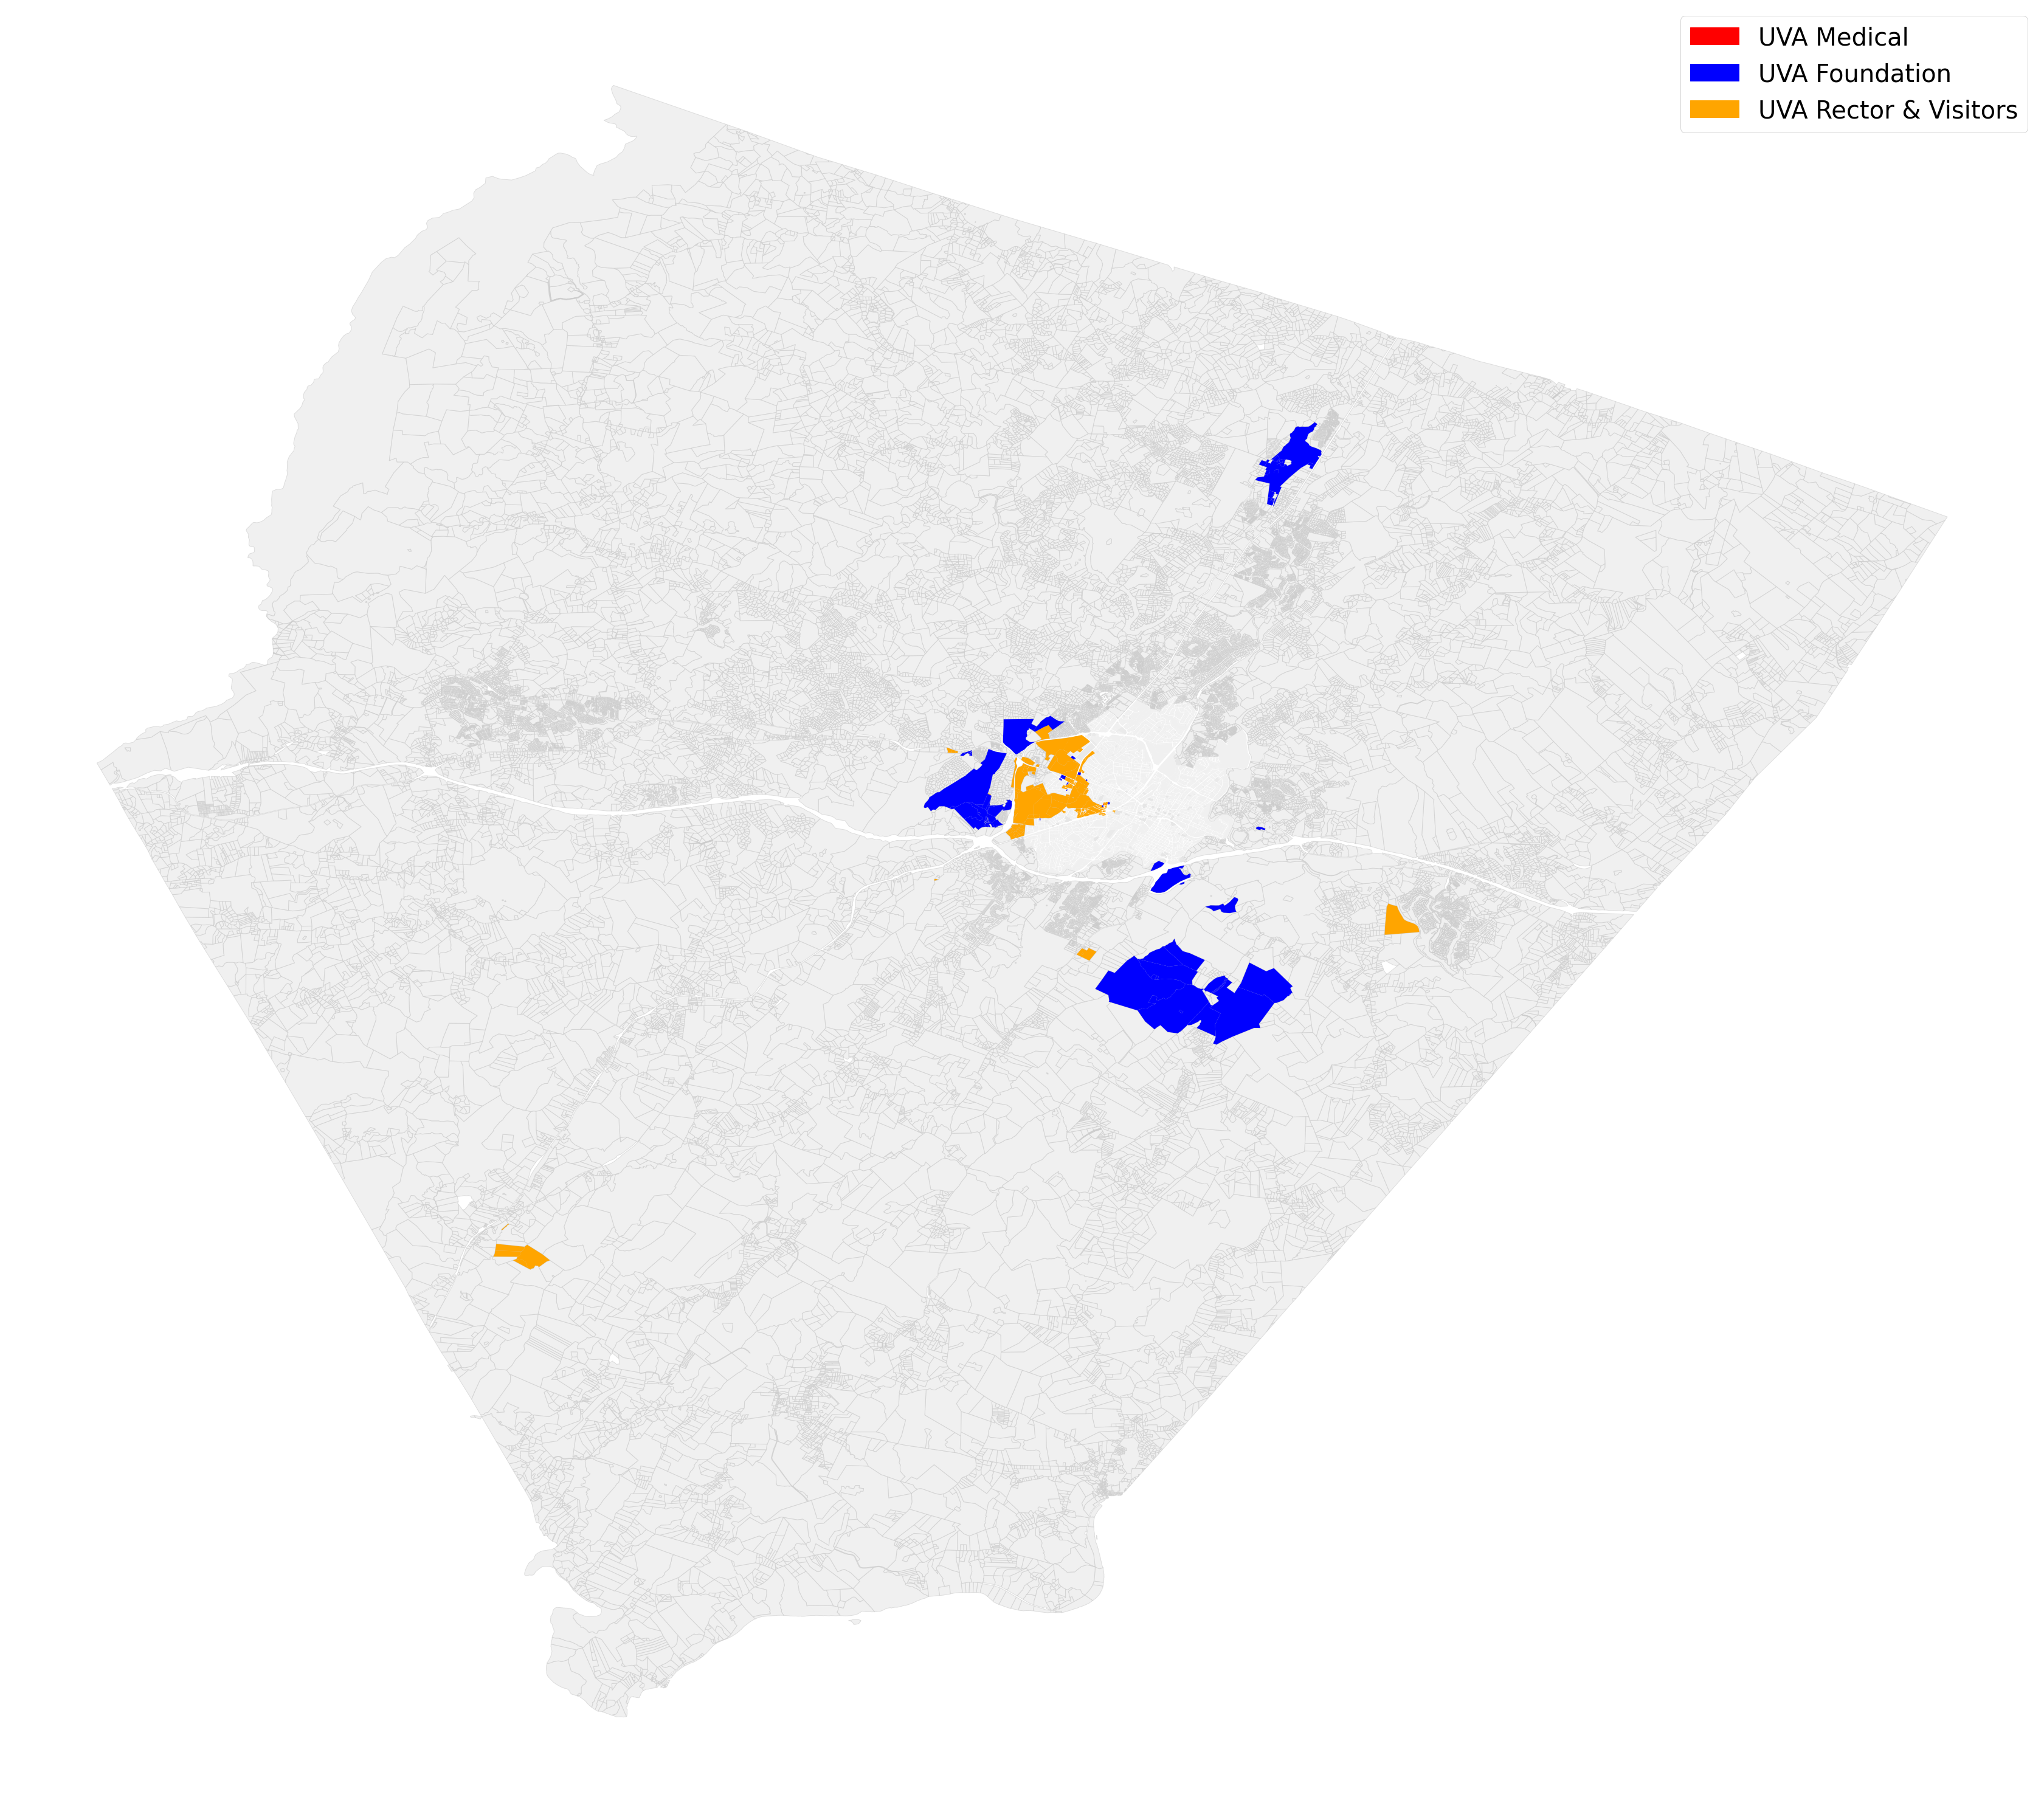

In [68]:

county_excel_data = urlopen('https://gisweb.albemarle.org/gisdata/CAMA/GIS_View_Redacted_ParcelInfo_XLSX.zip')

zf = ZipFile(BytesIO(county_excel_data.read()))
print(zf.namelist())
albemarle = pd.read_excel(zf.open('GIS_View_Redacted_ParcelInfo.xlsx'))
albemarle.dropna(axis=0, subset=['GPIN','Owner'], inplace=True)
albemarle.GPIN = albemarle.GPIN.astype('int64')
alb_geo = gpd.read_file('https://gisweb.albemarle.org/gisdata/Parcels/shape/parcels_shape_current.zip')

alb_geo.GPIN = alb_geo.GPIN.astype('int64')

alb_owned = albemarle.merge(alb_geo, on='GPIN')
alb_owned.drop_duplicates(subset='GPIN', keep='first', inplace=True)


alb_owned = gpd.GeoDataFrame(alb_owned, geometry='geometry')
alb_owned.crs = alb_geo.crs
print(alb_owned.crs)
alb_owned= alb_owned.to_crs("epsg:4326")
print (alb_owned.crs)

alb_foundation = alb_owned[alb_owned['Owner'].str.contains('UNIVERSITY OF VIRGINIA FOUNDATION', regex=True)]
alb_uva = alb_owned[(alb_owned['Owner'].str.contains("RECTORS ", regex = True))| (alb_owned['Owner'].str.contains("RECTOR ", regex = True)) ]

fig,ax = plt.subplots(figsize=(60,60))
alb_owned.plot(ax=ax, color='0.90', alpha=0.6, edgecolor='0.8')
newest.plot(ax=ax, color='0.90', alpha=0.6)
uva_properties.plot(ax=ax, color='orange')
alb_uva.plot(ax=ax, color='orange')
foundation.plot(ax=ax, color='blue')
alb_foundation.plot(ax=ax,color='blue')
medschool.plot(ax=ax, color='red')
plt.legend(handles=[red_patch, blue_patch, orange_patch], fontsize=40)

#plt.xlim(-78.73, -78.38)
#plt.ylim(37.87,38.18)
plt.axis("off")
plt.show()

In [60]:
print ('Dollar Value of UVA property in town:', f"{uva_properties.TotalValue.sum():,d}")
print ('Dollar Value of UVA property in Albemarle County:', f"{int(alb_uva.TotalValue.sum()):,d}")
print ('Dollar Value of UVA Foundation property in town:', f"{foundation.TotalValue.sum():,d}")
print ('Dollar Value of UVA Foundation property in Albemarle County:', f"{int(alb_foundation.TotalValue.sum()):,d}")
print ('Dollar Value of UVA Medical property in town:', f"{medschool.TotalValue.sum():,d}")


Dollar Value of UVA property in town: 1,292,106,000
Dollar Value of UVA property in Albemarle County: 2,369,263,100
Dollar Value of UVA Foundation property in town: 37,229,600
Dollar Value of UVA Foundation property in Albemarle County: 237,870,200
Dollar Value of UVA Medical property in town: 2,505,600
